# Assignment02 ANLY 590
---

In [20]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
import numpy as np
from keras.callbacks import TensorBoard
from keras.utils.data_utils import get_file
import io
from keras.preprocessing.text import one_hot
from keras.preprocessing import sequence
import random
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Convolution1D
from keras.optimizers import SGD
from keras.layers.embeddings import Embedding
from keras.preprocessing.text import one_hot
from keras.layers import LSTM
from keras.preprocessing.sequence import pad_sequences
from keras.optimizers import RMSprop
import numpy as np
from sklearn.model_selection import train_test_split
import requests


#REF: https://blog.keras.io/building-autoencoders-in-keras.html
input_img = Input(shape=(28, 28, 1))  

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)


x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')


In [21]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [22]:
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 33s 557us/step - loss: 0.3737 - val_loss: 0.3377
Epoch 2/5
60000/60000 [==============================] - 32s 541us/step - loss: 0.3293 - val_loss: 0.3233
Epoch 3/5
60000/60000 [==============================] - 32s 541us/step - loss: 0.3176 - val_loss: 0.3177
Epoch 4/5
60000/60000 [==============================] - 33s 542us/step - loss: 0.3103 - val_loss: 0.3115
Epoch 5/5
60000/60000 [==============================] - 33s 543us/step - loss: 0.3062 - val_loss: 0.3071


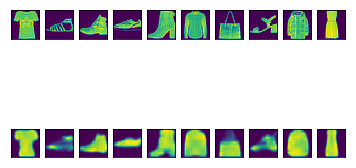

In [25]:
# Choose 10 random images in the testset and comapre them 
decoded_imgs = autoencoder.predict(x_test)
index = np.random.randint(x_test.shape[0], size=10)
f, axarr = plt.subplots(2, 10)
for i in range(10):
    axarr[0,i].imshow(x_test[index[i]].reshape(28, 28))
    axarr[0,i].get_xaxis().set_visible(False)
    axarr[0,i].get_yaxis().set_visible(False)
    axarr[1,i].imshow(decoded_imgs[index[i]].reshape(28, 28))
    axarr[1,i].get_xaxis().set_visible(False)
    axarr[1,i].get_yaxis().set_visible(False)


## 2


In [21]:
from keras.models import Sequential
from keras.layers import Dropout, Flatten
import keras
input_shape = (28, 28, 1)
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),
                 padding="same",
                 activation='relu',
                 strides=(2, 2),
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding="same"))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               1180160   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
__________

In [23]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

4423680/4422102 [==============================] - 1s 0us/step


In [24]:
num_category = 10
y_train = keras.utils.to_categorical(y_train, num_category)
y_test = keras.utils.to_categorical(y_test, num_category)

In [37]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [38]:
batch_size = 256
num_epoch = 10
#model training
model_log = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 21s 351us/step - loss: 0.6780 - acc: 0.7496 - val_loss: 0.5002 - val_acc: 0.8115
Epoch 2/10
60000/60000 [==============================] - 20s 340us/step - loss: 0.4068 - acc: 0.8520 - val_loss: 0.4825 - val_acc: 0.8076
Epoch 3/10
60000/60000 [==============================] - 20s 341us/step - loss: 0.3461 - acc: 0.8735 - val_loss: 0.3439 - val_acc: 0.8716
Epoch 4/10
60000/60000 [==============================] - 20s 339us/step - loss: 0.3122 - acc: 0.8860 - val_loss: 0.3081 - val_acc: 0.8882
Epoch 5/10
60000/60000 [==============================] - 20s 338us/step - loss: 0.2858 - acc: 0.8953 - val_loss: 0.3105 - val_acc: 0.8839
Epoch 6/10
60000/60000 [==============================] - 20s 340us/step - loss: 0.2667 - acc: 0.9011 - val_loss: 0.2777 - val_acc: 0.8977
Epoch 7/10
60000/60000 [==============================] - 20s 340us/step - loss: 0.2502 - acc: 0.9077 - val_loss: 0.

In [39]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]) 

Test loss: 0.2356603879570961
Test accuracy: 0.9127


In [40]:
score = model.evaluate(X_train, y_train, verbose=0)
print('Training loss:', score[0]) 
print('Training accuracy:', score[1]) 

Training loss: 0.16856764832884072
Training accuracy: 0.9374166666666667


## 2.2 Transfer Learning

In [41]:
import cv2
from keras.applications import VGG16

# loading the data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
num_category = 10
y_train = keras.utils.to_categorical(y_train, num_category)
y_test = keras.utils.to_categorical(y_test, num_category)
# converting it to RGB
x_train = [cv2.cvtColor(cv2.resize(i, (32,32)), cv2.COLOR_GRAY2BGR) for i in x_train]
x_train = np.concatenate([arr[np.newaxis] for arr in x_train]).astype('float32')

x_test = [cv2.cvtColor(cv2.resize(i, (32,32)), cv2.COLOR_GRAY2BGR) for i in x_test]
x_test = np.concatenate([arr[np.newaxis] for arr in x_test]).astype('float32')

conv_base = VGG16(weights='imagenet', include_top=False,input_shape = (32,32,3))
for layer in conv_base.layers:
    layer.trainable = False

    
model = Sequential()
model.add(conv_base)
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


batch_size = 256
num_epoch = 5
#model training
model_log = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 178s 3ms/step - loss: 3.6076 - acc: 0.6377 - val_loss: 1.5598 - val_acc: 0.7822
Epoch 2/5
60000/60000 [==============================] - 178s 3ms/step - loss: 1.5776 - acc: 0.7483 - val_loss: 0.9521 - val_acc: 0.7992
Epoch 3/5
60000/60000 [==============================] - 178s 3ms/step - loss: 1.0708 - acc: 0.7646 - val_loss: 0.9851 - val_acc: 0.7491
Epoch 4/5
60000/60000 [==============================] - 178s 3ms/step - loss: 0.8997 - acc: 0.7678 - val_loss: 0.7713 - val_acc: 0.7772
Epoch 5/5
60000/60000 [==============================] - 178s 3ms/step - loss: 0.7972 - acc: 0.7743 - val_loss: 0.7331 - val_acc: 0.7730


In [42]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]) 

Test loss: 0.7330641277313232
Test accuracy: 0.773


In [43]:
score = model.evaluate(x_train, y_train, verbose=0)
print('Training loss:', score[0]) 
print('Training accuracy:', score[1]) 

Training loss: 0.6848254335562388
Training accuracy: 0.78305


# 3 Text Classification
## 3.1 RNN

In [1]:
from keras.utils.data_utils import get_file
import io
from keras.preprocessing.text import one_hot
from keras.preprocessing import sequence
import random
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Convolution1D
from keras.optimizers import SGD
from keras.layers.embeddings import Embedding
from keras.preprocessing.text import one_hot
from keras.layers import LSTM
from keras.preprocessing.sequence import pad_sequences
from keras.optimizers import RMSprop
import numpy as np
from sklearn.model_selection import train_test_split
import requests

benign = requests.get('https://s3.amazonaws.com/anly-590/url-classification/benign-urls.txt').text.split('\n')
malicious = requests.get('https://s3.amazonaws.com/anly-590/url-classification/malicious-urls.txt').text.split('\n')
benign_toapp = []
malicious_toapp = []
for i in benign:
    if i[0]!='#':
        i = i.rstrip("\n\r")
        benign_toapp.append(i.lower()) 

for i in malicious:
    if len(i)>0:
        if i[0]!='#':
            i = i.rstrip("\n\r")
            malicious_toapp.append(i.lower()) 

temp_X = benign_toapp+malicious_toapp

join_x = ''.join(map(str, temp_X))


chars = sorted(list(set(join_x)))
char_indices = dict((c, i) for i, c in enumerate(chars))
max_len = max([len(i) for i in temp_X])

X = np.zeros((len(temp_X), max_len, len(chars)), dtype=np.uint8 )
Y = np.concatenate([np.zeros(len(benign_toapp)), np.ones(len(malicious_toapp))])
for i, seq in enumerate(temp_X):
    for t, char in enumerate(seq):
        X[i, t, char_indices[char]] = 1

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=111)

model = Sequential()
model.add(LSTM(64, input_shape=(max_len, len(chars))))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

model_log = model.fit(X_train, Y_train,
          batch_size=128,
          epochs=5,
          verbose=1,
          validation_data=(X_test, Y_test))


/Users/xintongzhao/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Train on 53848 samples, validate on 13463 samples
Epoch 1/5
53848/53848 [==============================] - 31s 569us/step - loss: 0.1149 - acc: 0.9804 - val_loss: 0.0905 - val_acc: 0.9820
Epoch 2/5
53848/53848 [==============================] - 30s 549us/step - loss: 0.0967 - acc: 0.9804 - val_loss: 0.0915 - val_acc: 0.9820
Epoch 3/5
53848/53848 [==============================] - 30s 554us/step - loss: 0.0966 - acc: 0.9804 - val_loss: 0.0904 - val_acc: 0.9820
Epoch 4/5
53848/53848 [==============================] - 29s 545us/step - loss: 0.0965 - acc: 0.9804 - val_loss: 0.0905 - val_acc: 0.9820
Epoch 5/5
53848/53848 [==============================] - 30s 553us/step - loss: 0.0966 - acc: 0.9804 - val_loss: 0.0904 - val_acc: 0.9820


In [18]:
model.summary()
score = model.evaluate(X_train, Y_train, verbose=0)
print('Training loss:', score[0]) 
print('Training accuracy:', score[1]) 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                27136     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 27,201
Trainable params: 27,201
Non-trainable params: 0
_________________________________________________________________
Training loss: 0.09630201856243611
Training accuracy: 0.9804449561729313


In [3]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]) 

Test loss: 0.09038317000765547
Test accuracy: 0.9819505310851965


#  CNN

In [9]:
from keras.layers import Input, Dense, Conv1D, MaxPooling1D, UpSampling2D,Flatten

model1 = Sequential()
model1.add(Conv1D(filters=128, kernel_size=4, padding='same', activation='relu',input_shape=(max_len, len(chars))))
model1.add(MaxPooling1D(pool_size=4))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

model_log = model1.fit(X_train, Y_train,
          batch_size=128,
          epochs=5,
          verbose=1,
          validation_data=(X_test, Y_test))


Train on 53848 samples, validate on 13463 samples
Epoch 1/5
53848/53848 [==============================] - 9s 168us/step - loss: 0.0545 - acc: 0.9785 - val_loss: 0.0252 - val_acc: 0.9863
Epoch 2/5
53848/53848 [==============================] - 9s 166us/step - loss: 0.0241 - acc: 0.9886 - val_loss: 0.0213 - val_acc: 0.9892
Epoch 3/5
53848/53848 [==============================] - 9s 167us/step - loss: 0.0202 - acc: 0.9921 - val_loss: 0.0183 - val_acc: 0.9932
Epoch 4/5
53848/53848 [==============================] - 9s 168us/step - loss: 0.0161 - acc: 0.9941 - val_loss: 0.0183 - val_acc: 0.9914
Epoch 5/5
53848/53848 [==============================] - 9s 174us/step - loss: 0.0116 - acc: 0.9952 - val_loss: 0.0158 - val_acc: 0.9935


In [17]:
model1.summary()
score = model1.evaluate(X_train, Y_train, verbose=0)
print('Training loss:', score[0]) 
print('Training accuracy:', score[1]) 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 86, 128)           21120     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 21, 128)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2688)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               344192    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 365,441
Trainable params: 365,441
Non-trainable params: 0
_________________________________________________________________
Training loss: 0.0069494026906491094
Training accuracy: 0.9978457881444065


In [11]:
score = model1.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]) 

Test loss: 0.01577268094899767
Test accuracy: 0.9934635668127461


To compare performance, ROC curve is a good way to visualize the performance.

In [15]:
#REF: https://scikit-learn.org/stable/auto_examples/ensemble/plot_feature
#_transformation.html#sphx-glr-auto-examples-ensemble-plot-feature-
#transformation-py
from sklearn.metrics import roc_curve
y_pred = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)

y_pred1 = model1.predict(X_test).ravel()
fpr1, tpr1, thresholds1 = roc_curve(Y_test, y_pred1)

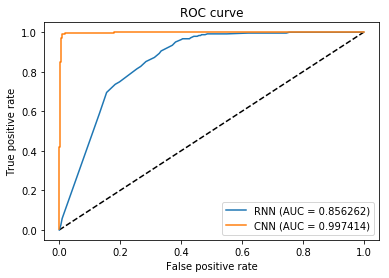

In [16]:
#REF: https://scikit-learn.org/stable/auto_examples/ensemble/plot_feature
#_transformation.html#sphx-glr-auto-examples-ensemble-plot-feature-
#transformation-py
from sklearn.metrics import auc
import matplotlib.pyplot as plt
auc1 = auc(fpr, tpr)
auc2 = auc(fpr1, tpr1)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='RNN (AUC = {:.6f})'.format(auc1))
plt.plot(fpr1, tpr1, label='CNN (AUC = {:.6f})'.format(auc2))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


## Reference:
https://blog.keras.io/building-autoencoders-in-keras.html<br>
Discussion with classmates<br>
https://scikit-learn.org/stable/auto_examples/ensemble/plot_feature_transformation.html#sphx-glr-auto-examples-ensemble-plot-feature-transformation-py